In [66]:
import pandas as pd

# Diccionario de rutas
archivos = {
    "Colocación aleatoria": "Resultados/Colocacion_aleatoria/metricas.csv",
    "Autómata Celular": "Resultados/Automata_celular/metricas.csv",
    "División Espacial": "Resultados/Division_espacial/metricas.csv"
}

# Cargar todos los datasets y limpiar
datos = {}
for nombre, ruta in archivos.items():
    df = pd.read_csv(ruta)
    df = df[df["fallo"].isnull() | (df["fallo"] == 0)]
    datos[nombre] = df

# Verificación
for nombre, df in datos.items():
    print(f"{nombre}: {df.shape[0]} filas después de limpieza.")


Colocación aleatoria: 81 filas después de limpieza.
Autómata Celular: 972 filas después de limpieza.
División Espacial: 324 filas después de limpieza.


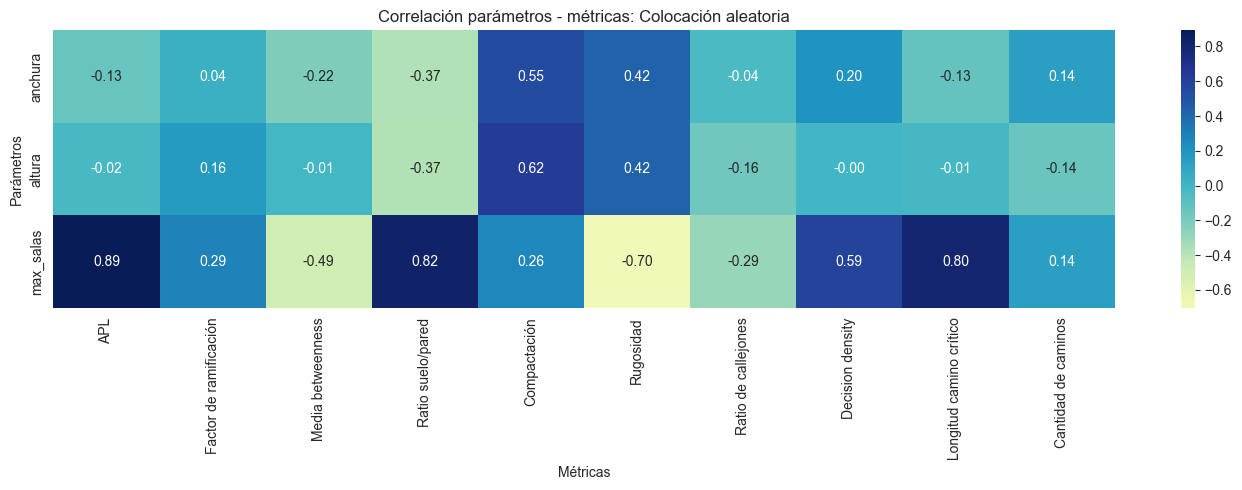

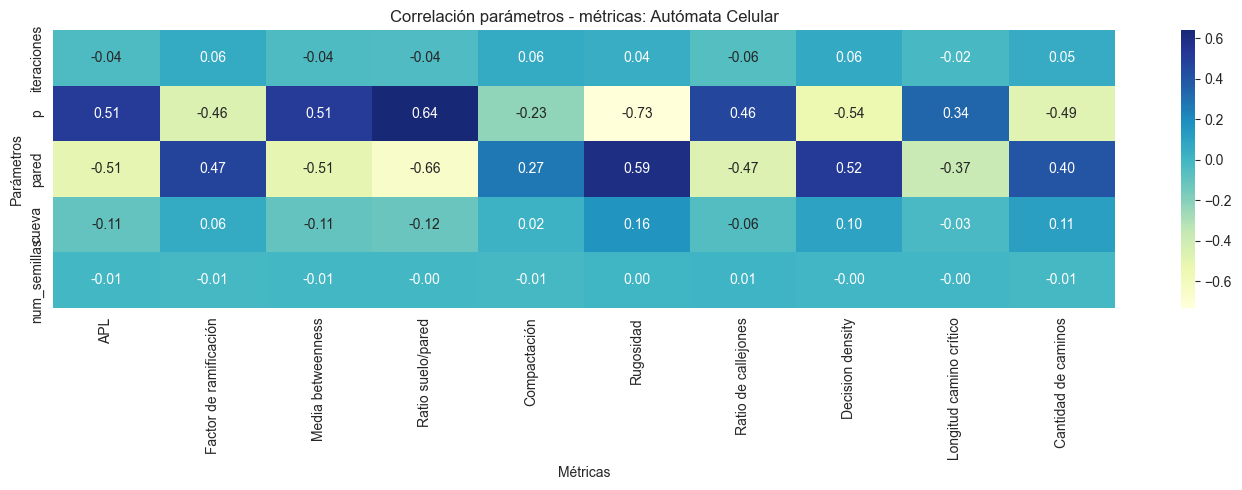

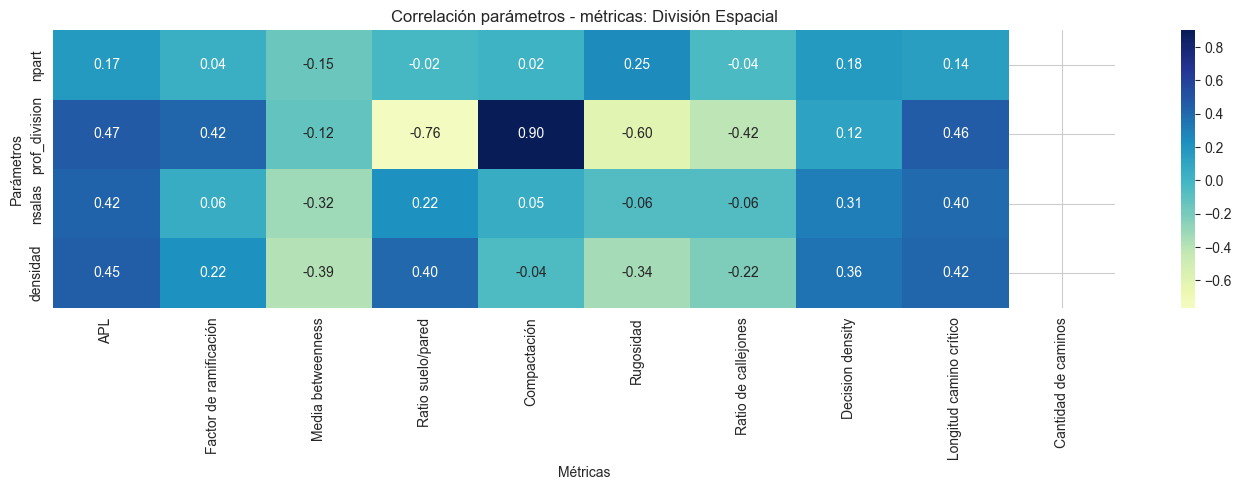

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas para analizar
metricas = [
    "APL", "Factor de ramificación", "Media betweenness",
    "Ratio suelo/pared", "Compactación", "Rugosidad",
    "Ratio de callejones", "Decision density",
    "Longitud camino crítico", "Cantidad de caminos"
]

# Parámetros por algoritmo
parametros_por_algoritmo = {
    "Colocación aleatoria": ["anchura", "altura", "max_salas"],
    "Autómata Celular": ["iteraciones", "p", "pared", "cueva", "num_semillas"],
    "División Espacial": ["npart","prof_division", "nsalas", "densidad"]
}

# Graficar heatmap por algoritmo
for nombre, df in datos.items():
    parametros = parametros_por_algoritmo[nombre]
    columnas = [col for col in parametros + metricas if col in df.columns]
    df_corr = df[columnas].corr(numeric_only=True)
    correlaciones = df_corr.loc[parametros, [m for m in metricas if m in df.columns]]

    plt.figure(figsize=(14, 5))
    sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="YlGnBu", center=0)
    plt.title(f"Correlación parámetros - métricas: {nombre}")
    plt.xlabel("Métricas")
    plt.ylabel("Parámetros")
    plt.tight_layout()
    plt.show()


In [68]:
# Función reutilizable
def graficas_parametro(df, parametro, metricas, titulo_base):
    for metrica in metricas:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=parametro, y=metrica)
        plt.title(f"{titulo_base} - {metrica}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.pointplot(data=df, x=parametro, y=metrica, errorbar="sd", capsize=0.2)
        plt.title(f"{titulo_base} (media y desviación) - {metrica}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Ejemplo para Autómata:
# graficas_parametro(datos["Autómata Celular"], "pared", metricas, "Autómata Celular: pared")


In [69]:
# Crear tabla comparativa
resumen_algoritmos = []

for nombre, df in datos.items():
    medias = df[metricas].mean()
    desviaciones = df[metricas].std()
    fila = {"Algoritmo": nombre}
    for m in metricas:
        if m in df.columns:
            fila[f"{m} (media)"] = round(medias[m], 3)
            fila[f"{m} (std)"] = round(desviaciones[m], 3)
    resumen_algoritmos.append(fila)

df_resumen = pd.DataFrame(resumen_algoritmos)
df_resumen = df_resumen.sort_values("Algoritmo")
df_resumen.set_index("Algoritmo", inplace=True)
df_resumen


,APL (media),APL (std),Factor de ramificación (media),Factor de ramificación (std),Media betweenness (media),Media betweenness (std),Ratio suelo/pared (media),Ratio suelo/pared (std),Compactación (media),Compactación (std),Rugosidad (media),Rugosidad (std),Ratio de callejones (media),Ratio de callejones (std),Decision density (media),Decision density (std),Longitud camino crítico (media),Longitud camino crítico (std),Cantidad de caminos (media),Cantidad de caminos (std)
Algoritmo,,,,,,,,,,,,,,,,,,,,
Autómata Celular,2.119,0.437,0.892,0.129,0.140,0.055,0.378,0.353,459.704,229.802,1.184,0.825,0.108,0.129,3.264,1.541,3.255,0.995,50.124,60.724
Colocación aleatoria,3.388,0.952,0.713,0.101,0.141,0.035,0.127,0.054,446.735,145.850,1.144,0.108,0.287,0.101,2.614,1.002,5.679,2.046,80576.657,722957.053
División Espacial,3.665,1.353,0.614,0.102,0.249,0.045,0.242,0.125,133.818,125.198,1.219,0.273,0.386,0.102,0.635,0.359,6.587,3.045,1.000,0.000


C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


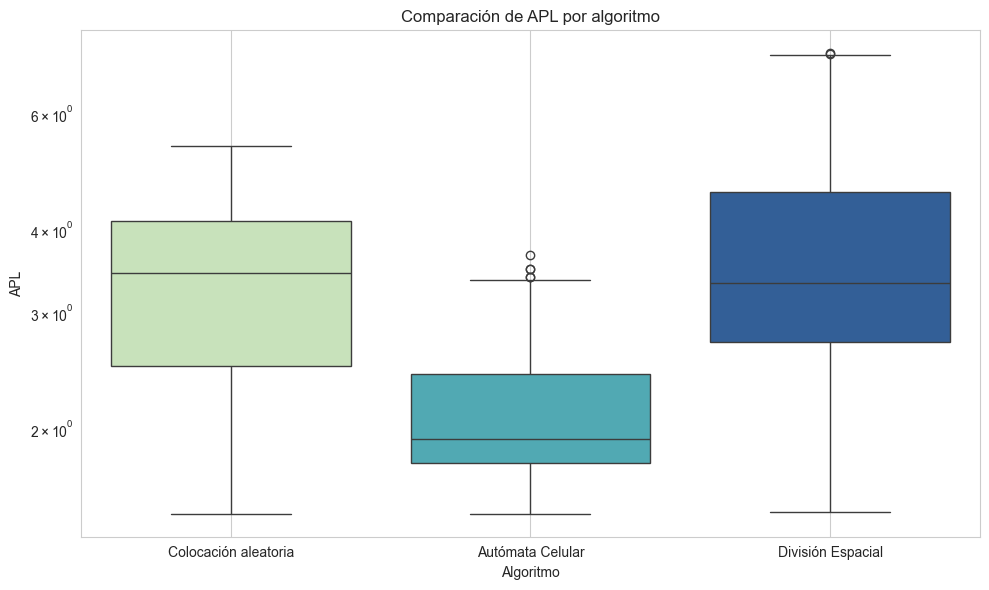

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


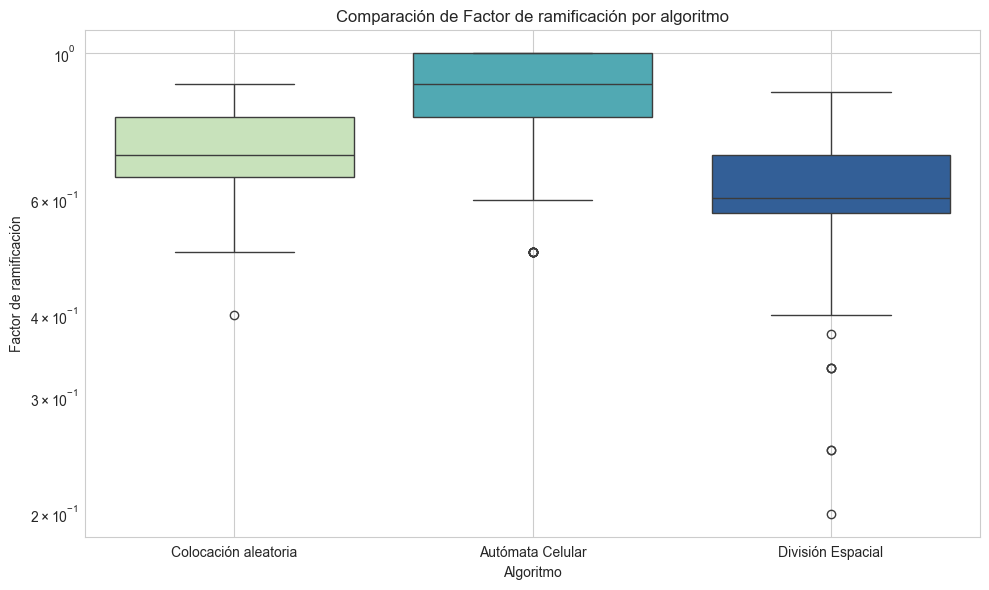

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


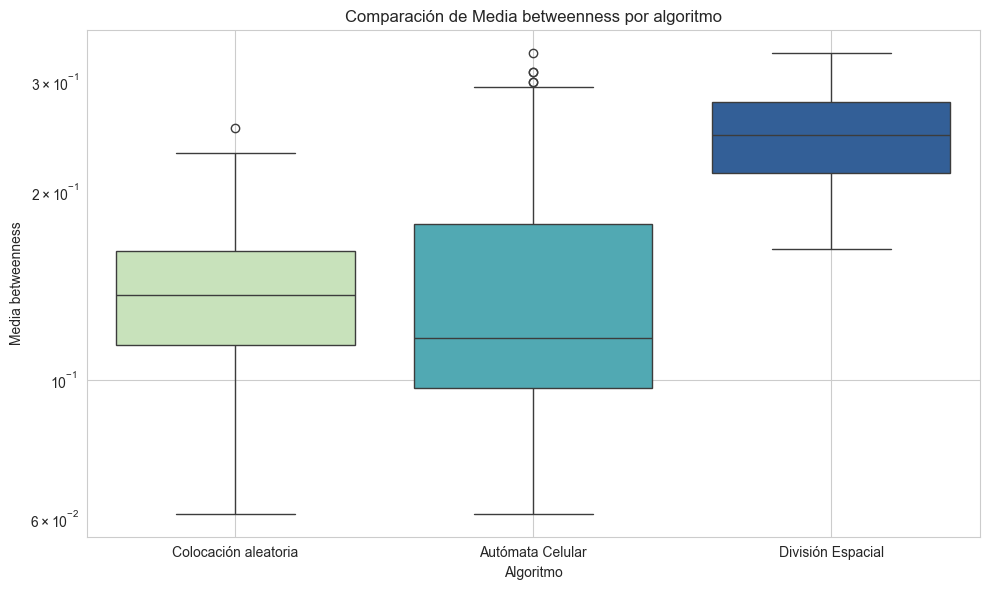

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


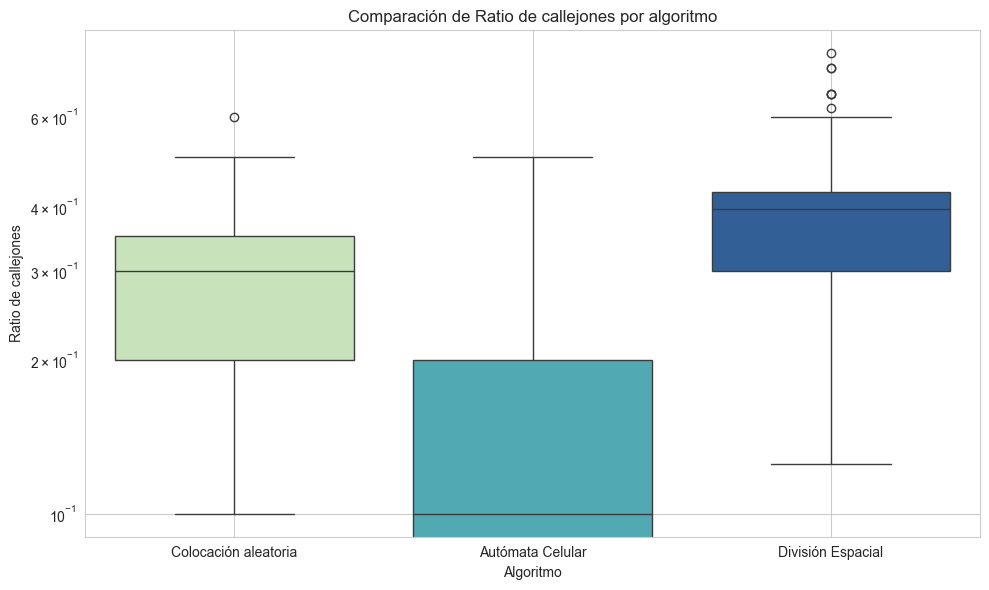

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


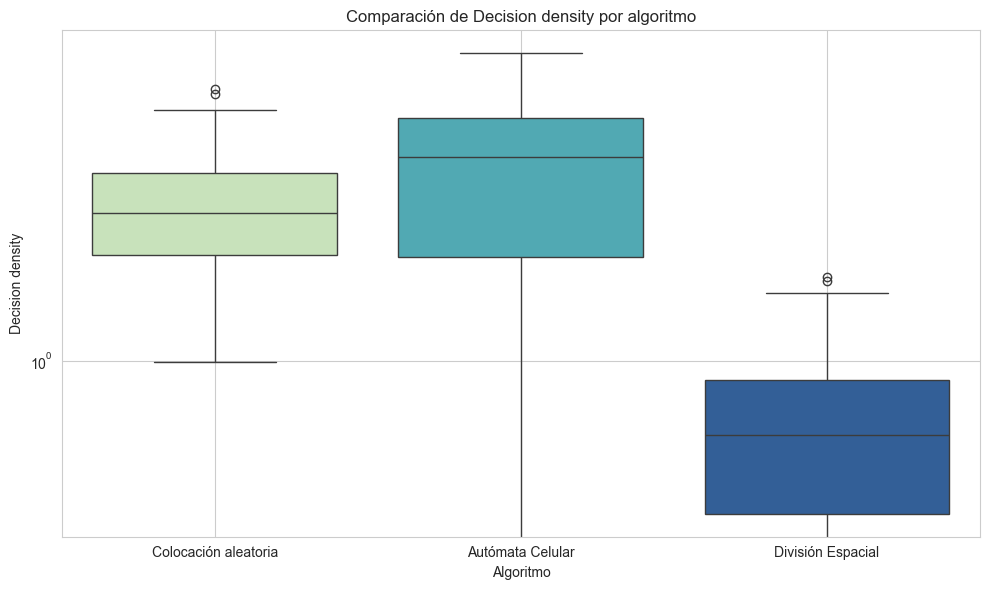

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


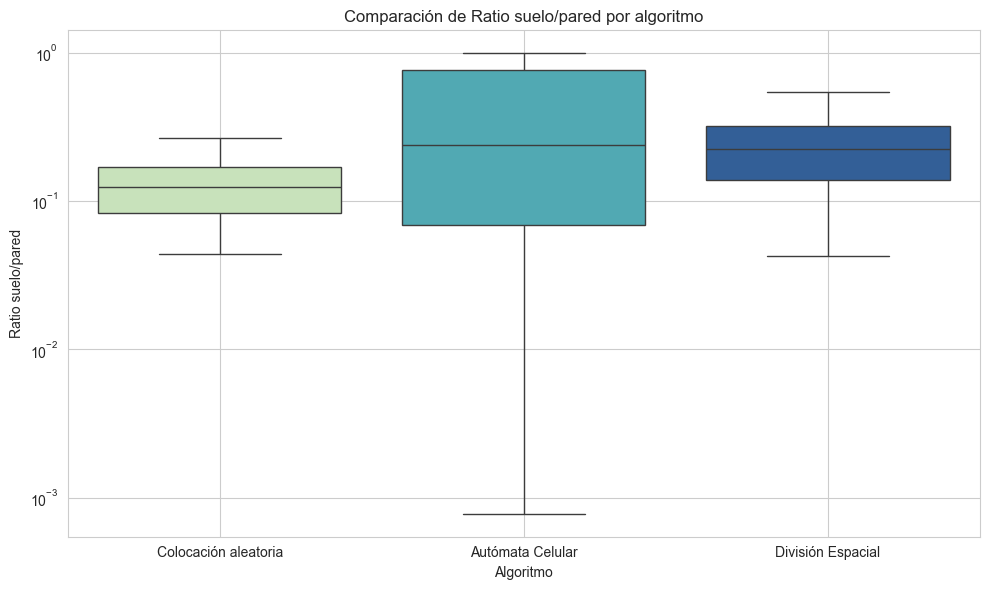

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


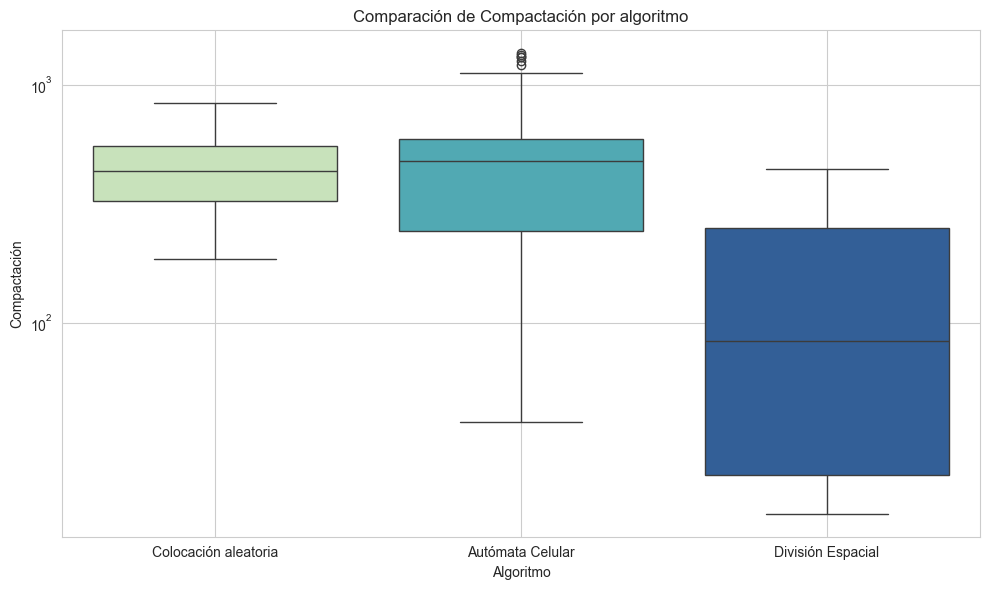

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


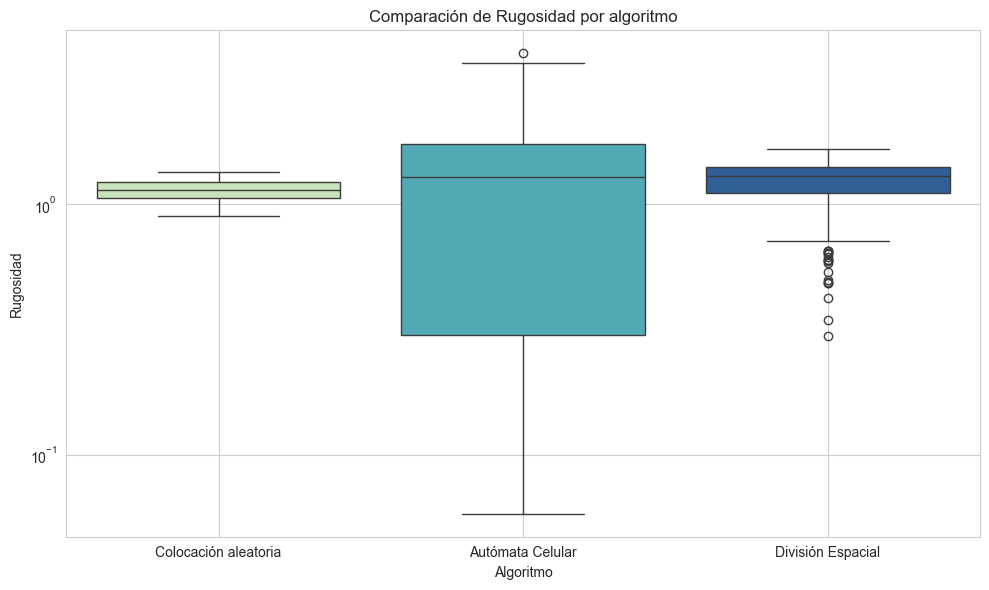

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


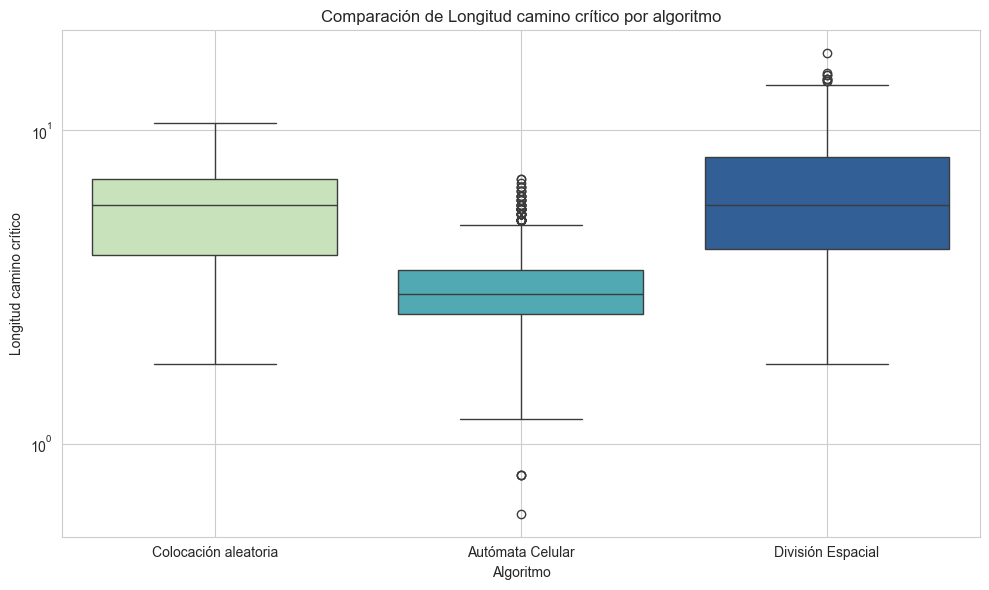

C:\Users\mario\AppData\Local\Temp\ipykernel_20828\3222389469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")


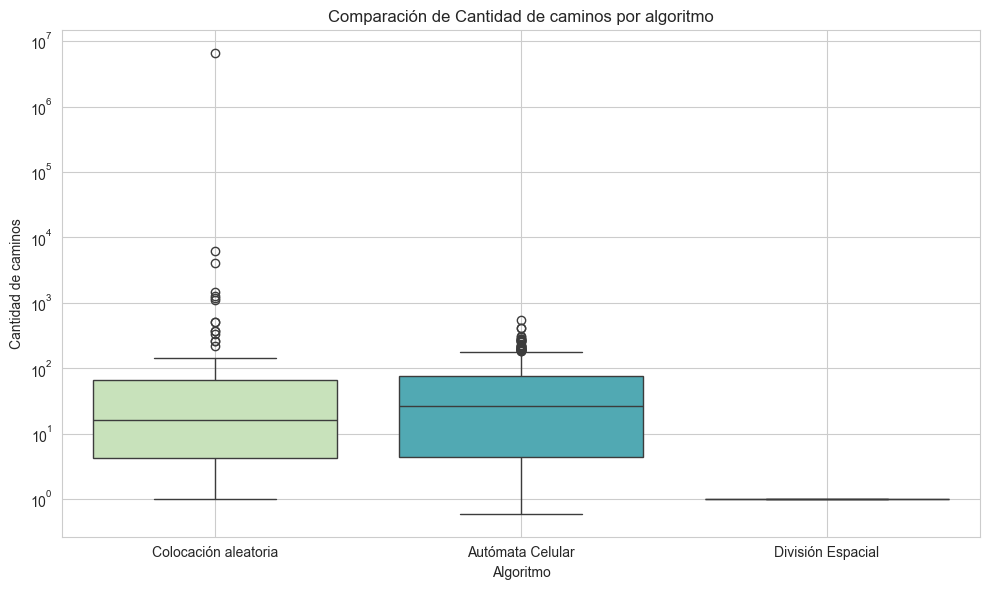

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenar todos los dataframes en uno solo con columna "Algoritmo"
df_todos = pd.concat([
    datos["Colocación aleatoria"].assign(Algoritmo="Colocación aleatoria"),
    datos["Autómata Celular"].assign(Algoritmo="Autómata Celular"),
    datos["División Espacial"].assign(Algoritmo="División Espacial")
])

# Comparar visualmente todas las métricas
for metrica in metricas:
    if metrica in df_todos.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_todos, x="Algoritmo", y=metrica, palette="YlGnBu")
        plt.yscale("log")
        plt.title(f"Comparación de {metrica} por algoritmo")    
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [71]:
# Crear tabla de CV (std / media) para cada métrica y algoritmo
cv_resultados = []

for nombre, df in datos.items():
    medias = df[metricas].mean()
    desviaciones = df[metricas].std()
    fila = {"Algoritmo": nombre}
    for m in metricas:
        if m in df.columns and medias[m] != 0:
            fila[m] = round(desviaciones[m] / medias[m], 3)
    cv_resultados.append(fila)

df_cv = pd.DataFrame(cv_resultados).set_index("Algoritmo")
df_cv


,APL,Factor de ramificación,Media betweenness,Ratio suelo/pared,Compactación,Rugosidad,Ratio de callejones,Decision density,Longitud camino crítico,Cantidad de caminos
Algoritmo,,,,,,,,,,
Colocación aleatoria,0.281,0.141,0.251,0.423,0.326,0.094,0.350,0.383,0.360,8.972
Autómata Celular,0.206,0.145,0.390,0.936,0.500,0.697,1.192,0.472,0.306,1.211
División Espacial,0.369,0.166,0.180,0.517,0.936,0.224,0.265,0.566,0.462,0.000


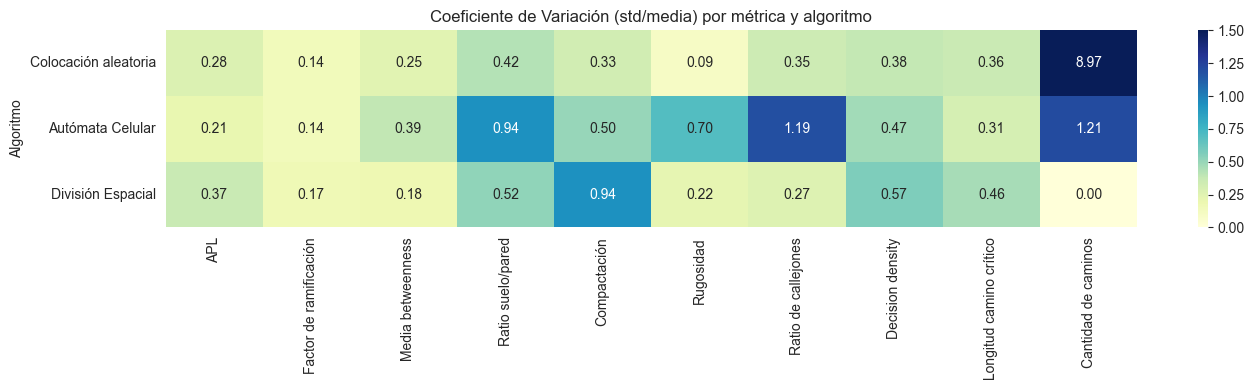

In [83]:
plt.figure(figsize=(14, 4))
sns.heatmap(df_cv, annot=True, fmt=".2f", cmap="YlGnBu",vmin=0,vmax=1.5)
plt.title("Coeficiente de Variación (std/media) por métrica y algoritmo")
plt.tight_layout()
plt.show()


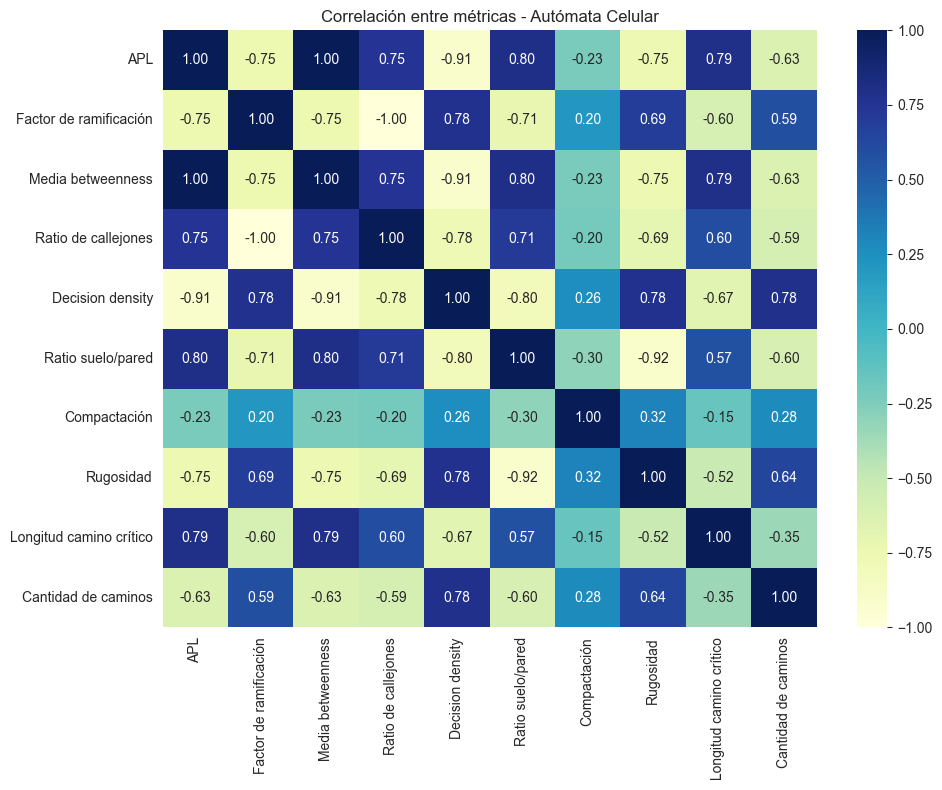

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

metricas = [
    "APL", "Factor de ramificación", "Media betweenness",
    "Ratio de callejones", "Decision density",
    "Ratio suelo/pared", "Compactación", "Rugosidad",
    "Longitud camino crítico", "Cantidad de caminos"
]

# Filtrar errores
df_auto_clean = datos["Autómata Celular"][datos["Autómata Celular"]["fallo"].isnull() | (datos["Autómata Celular"]["fallo"] == 0)]

# Calcular y mostrar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_auto_clean[metricas].corr(), annot=True, fmt=".2f", cmap="YlGnBu", center=0)
plt.title("Correlación entre métricas - Autómata Celular")
plt.tight_layout()
plt.show()


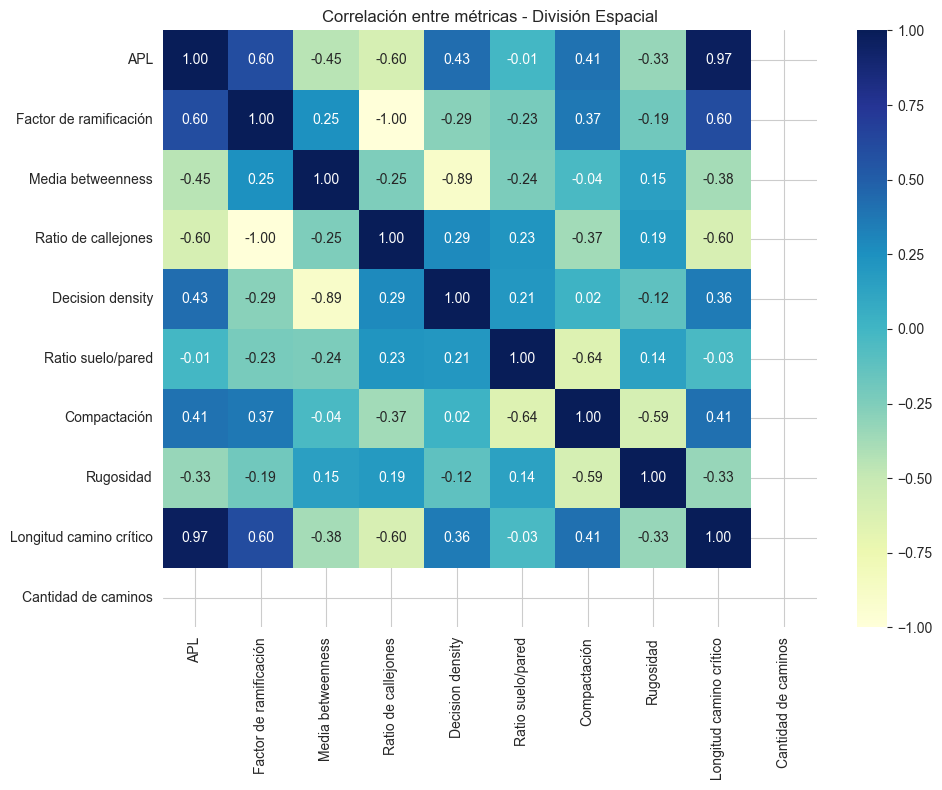

In [85]:
df_div_clean = datos["División Espacial"][datos["División Espacial"]["fallo"].isnull() | (datos["División Espacial"]["fallo"] == 0)]

plt.figure(figsize=(10, 8))
sns.heatmap(df_div_clean[metricas].corr(), annot=True, fmt=".2f", cmap="YlGnBu", center=0)
plt.title("Correlación entre métricas - División Espacial")
plt.tight_layout()
plt.show()


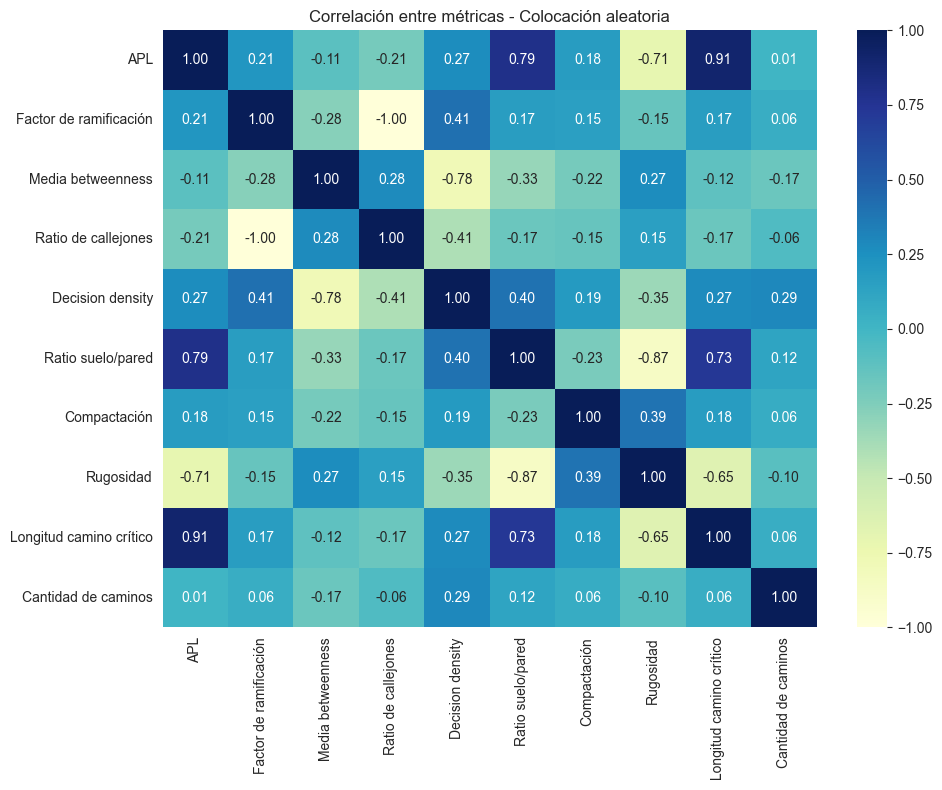

In [86]:
df_random_clean = datos['Colocación aleatoria'][datos['Colocación aleatoria']["fallo"].isnull() | (datos['Colocación aleatoria']["fallo"] == 0)]

plt.figure(figsize=(10, 8))
sns.heatmap(df_random_clean[metricas].corr(), annot=True, fmt=".2f", cmap="YlGnBu", center=0)
plt.title("Correlación entre métricas - Colocación aleatoria")
plt.tight_layout()
plt.show()


---

In [76]:
datos['Colocación aleatoria']

,semilla,anchura,altura,max_salas,APL,Factor de ramificación,Media betweenness,Ratio de callejones,Decision density,Ratio suelo/pared,Compactación,Rugosidad,Longitud camino crítico,Cantidad de caminos,tiempo_ejecucion,fallo
0,2213234247,60,60,10,2.600000,0.600000,0.200000,0.400000,1.153846,0.106389,226.839777,1.169713,4.0,2.0,0.558907,False
1,2717523837,60,60,10,2.222222,0.600000,0.152778,0.400000,1.800000,0.101944,184.862750,1.117166,3.2,4.2,0.575466,False
2,1104963096,60,60,10,2.288889,0.400000,0.161111,0.600000,1.310680,0.102222,241.311695,1.114130,3.2,2.0,0.538983,False
3,3477968192,60,60,20,3.857895,0.700000,0.158772,0.300000,1.814461,0.190556,281.206319,1.020408,8.0,20.0,0.547411,False
4,3875062446,60,60,20,4.184211,0.650000,0.176901,0.350000,2.389937,0.181944,254.827339,0.967939,7.2,5.2,0.543730,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2094260010,100,100,20,3.442105,0.650000,0.135673,0.350000,2.324159,0.084000,651.276818,1.233333,5.8,8.8,0.532207,False
77,2153999908,100,100,20,2.984211,0.600000,0.110234,0.400000,3.015873,0.097400,839.276938,1.320329,5.2,57.2,0.566200,False
78,3674654943,100,100,30,3.751724,0.733333,0.098276,0.266667,3.465074,0.122600,842.008510,1.200653,6.8,139.8,0.578628,False
79,571854917,100,100,30,4.416092,0.666667,0.122003,0.333333,2.717335,0.126500,758.920589,1.200000,7.6,18.8,0.562296,False


In [77]:
datos["Autómata Celular"]

,semilla,iteraciones,dimensiones,p,pared,cueva,num_semillas,APL,Factor de ramificación,Media betweenness,Ratio de callejones,Decision density,Ratio suelo/pared,Compactación,Rugosidad,Longitud camino crítico,Cantidad de caminos,tiempo_ejecucion,fallo
0,3010602156,3,50,0.4,3,5,5,1.955556,1.0,0.119444,0.0,4.090909,0.273200,227.131525,1.402635,3.2,36.6,1.241047,False
1,228576025,3,50,0.4,3,5,5,2.644444,0.9,0.205556,0.1,1.890756,0.373200,244.601846,1.069668,3.2,3.6,1.180638,False
2,777949801,3,50,0.4,3,5,5,2.066667,0.9,0.133333,0.1,2.903226,0.249600,242.348387,1.557692,2.6,10.6,1.191146,False
3,1026247827,3,50,0.4,3,5,10,2.355556,1.0,0.169444,0.0,0.849057,0.267600,230.214478,1.479821,4.0,4.8,1.225604,False
4,2968596156,3,50,0.4,3,5,10,2.066667,0.9,0.133333,0.1,2.419355,0.266800,245.162452,1.469265,2.2,7.0,1.232246,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,711909805,5,80,0.6,5,6,10,1.777778,1.0,0.097222,0.0,3.375000,0.115156,744.590310,1.109905,2.4,37.8,1.505522,False
968,1447168474,5,80,0.6,5,6,10,1.888889,0.9,0.111111,0.1,3.705882,0.093906,653.461560,1.437604,1.6,28.8,1.529759,False
969,2724452551,5,80,0.6,5,6,15,1.866667,1.0,0.108333,0.0,3.750000,0.098906,672.379142,1.289100,3.2,54.0,1.416229,False
970,2785636658,5,80,0.6,5,6,15,2.044444,1.0,0.130556,0.0,3.913043,0.066875,644.536660,1.387850,4.0,89.0,1.536558,False


In [78]:
datos["División Espacial"]

,semilla,arquitectura,npart,prof_division,nsalas,densidad,APL,Factor de ramificación,Media betweenness,Ratio de callejones,Decision density,Ratio suelo/pared,Compactación,Rugosidad,Longitud camino crítico,Cantidad de caminos,tiempo_ejecucion,fallo
0,2204702644,clasica,40,3,10,1,2.333333,0.666667,0.333333,0.333333,0.000000,0.320312,23.370985,1.390244,4.2,1.0,0.992876,False
1,1007762776,clasica,40,3,10,1,2.666667,0.714286,0.333333,0.285714,0.000000,0.296875,28.071243,1.631579,4.6,1.0,1.073206,False
2,3551469340,clasica,40,3,10,1,1.866667,0.333333,0.216667,0.666667,0.535714,0.300781,17.938607,1.402597,2.8,1.0,1.014846,False
3,2867169249,clasica,40,3,10,2,2.333333,0.666667,0.333333,0.333333,0.000000,0.382812,21.986933,1.122449,4.2,1.0,1.032388,False
4,1807097528,clasica,40,3,10,2,3.000000,0.750000,0.333333,0.250000,0.000000,0.371094,24.924986,1.347368,5.2,1.0,1.028664,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,3478067507,clasica,120,5,30,2,6.363218,0.666667,0.191544,0.333333,1.100072,0.132812,313.338585,1.235294,10.8,1.0,3.002133,False
320,15561102,clasica,120,5,30,2,6.581609,0.633333,0.199343,0.366667,1.215508,0.124512,322.049875,1.356863,13.0,1.0,3.057051,False
321,2243082130,clasica,120,5,30,3,5.834483,0.633333,0.172660,0.366667,1.199764,0.193848,241.351891,0.831234,11.0,1.0,2.254257,False
322,4108784632,clasica,120,5,30,3,6.013793,0.666667,0.179064,0.333333,1.330275,0.270996,292.321690,0.632432,10.6,1.0,2.393785,False
